In [63]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import matplotlib.pyplot as plt
from keras import optimizers
# from matplotlib import rc
# from sklearn.model_selection import train_test_split
# from pandas.plotting import register_matplotlib_converters


In [64]:
x = np.arange(0, 200, 0.5).reshape(-1, 1)
y = np.sin(x).reshape(-1, 1)

In [65]:
x.shape, y.shape

((400, 1), (400, 1))

In [66]:
def lstm_data_transform(x_data, y_data, num_steps=5):
    """ Changes data to the format for LSTM training for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [88]:
num_steps = 10
x_new, y_new = lstm_data_transform(y, y, num_steps=num_steps)
print ("The new shape of x is", x_new.shape)

The new shape of x is (390, 10, 1)


In [89]:
train_ind = int(0.8 * x.shape[0])
x_train = x_new[:train_ind]
y_train = y_new[:train_ind]
x_test = x_new[train_ind:]
y_test = y_new[train_ind:]

In [90]:

model = keras.Sequential()
# model = Sequential()
model.add(keras.layers.LSTM(100, activation='tanh', input_shape=(num_steps, 1), return_sequences=False))
model.add(keras.layers.Dense(units=50, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='linear'))
adam = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam, loss='mse')
model.fit(x_train, y_train, epochs=20)


# model = keras.Sequential()
# model.add(keras.layers.LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(keras.layers.Dropout(rate=0.1))
# model.add(keras.layers.Dense(units=1))
# model.compile(loss='mean_squared_error', optimizer='adam')

Train on 320 samples
Epoch 1/20
320/320 [==============================] - 4s 12ms/sample - loss: 0.4886
Epoch 2/20
320/320 [==============================] - 0s 395us/sample - loss: 0.4674
Epoch 3/20
320/320 [==============================] - 0s 368us/sample - loss: 0.4458
Epoch 4/20
320/320 [==============================] - 0s 366us/sample - loss: 0.4227
Epoch 5/20
320/320 [==============================] - 0s 339us/sample - loss: 0.3962
Epoch 6/20
320/320 [==============================] - 0s 300us/sample - loss: 0.3662
Epoch 7/20
320/320 [==============================] - 0s 398us/sample - loss: 0.3324
Epoch 8/20
320/320 [==============================] - 0s 302us/sample - loss: 0.2936
Epoch 9/20
320/320 [==============================] - 0s 371us/sample - loss: 0.2505
Epoch 10/20
320/320 [==============================] - 0s 250us/sample - loss: 0.2056
Epoch 11/20
320/320 [==============================] - 0s 389us/sample - loss: 0.1594
Epoch 12/20
320/320 [======================

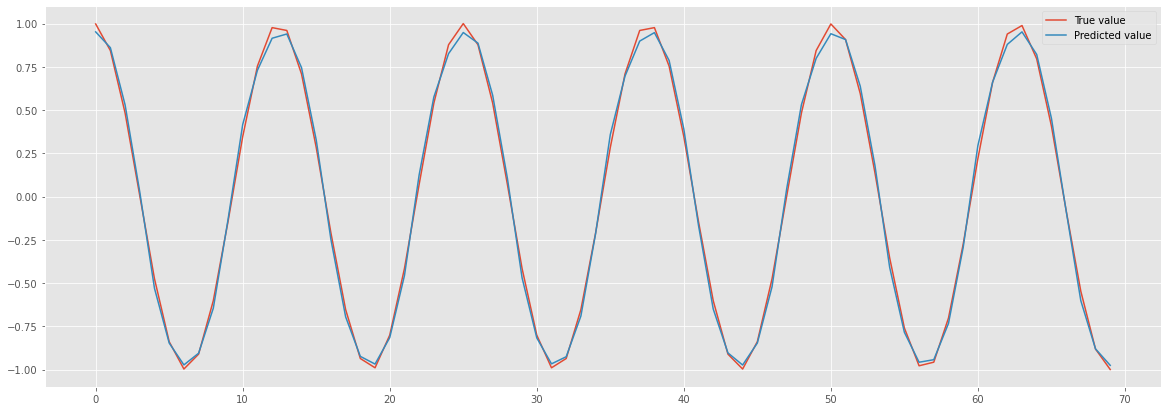

In [91]:
test_predict = model.predict(x_test)
plt.style.use('ggplot')
plt.figure(figsize=(20, 7))
plt.plot(y_test, label="True value")
plt.plot(test_predict.ravel(), label="Predicted value")
plt.legend()

In [92]:
dataset = np.loadtxt('ge3_data_all_beta_nolabel.csv', delimiter=',')
xdata = dataset[:,0:9]
ydata = dataset[:,9]


In [93]:
num_steps = 3
x_new, y_new = lstm_data_transform(ydata, ydata, num_steps=num_steps)
print ("The new shape of x is", x_new.shape)

The new shape of x is (2475, 3)


In [94]:
train_ind = int(0.8 * x_data.shape[0])
x_train = x_data[:train_ind]
x_test = x_data[train_ind:]
y_train = y_data[:train_ind].reshape(-1,1)
y_test = y_data[train_ind:].reshape(-1,1)

In [95]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1982, 9), (496, 9), (1982, 1), (496, 1))

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# scalers
scaler_x = StandardScaler()
scaler_y = StandardScaler()
# scaling
x_train_sc = scaler_x.fit_transform(x_train)
x_test_sc = scaler_x.transform(x_test)
y_train_sc = scaler_y.fit_transform(y_train)
y_test_sc = scaler_y.transform(y_test)

In [97]:
x_train_sc.shape, x_test_sc.shape, y_train_sc.shape, y_test_sc.shape

((1982, 9), (496, 9), (1982, 1), (496, 1))

In [111]:
num_feat = 9
# training set
x_train_shaped = np.reshape(x_train_sc, newshape=(-1, num_steps, 3))
y_train_shaped = np.reshape(y_train_sc, newshape=(-1, num_steps, 1))
assert x_train_shaped.shape[0] == y_train_shaped.shape[0]
# test set
x_test_shaped = np.reshape(x_test_sc, newshape=(-1, num_steps, 3))
y_test_shaped = np.reshape(y_test_sc, newshape=(-1, num_steps, 1))
assert x_test_shaped.shape[0] == y_test_shaped.shape[0]

ValueError: cannot reshape array of size 1982 into shape (3,1)

In [108]:
x_train_shaped.shape

(1982, 3, 3)

In [109]:

model = keras.Sequential()
model.add(keras.layers.LSTM(20, activation='tanh', input_shape=(num_steps, 3), return_sequences=True))
model.add(keras.layers.Dense(units=20, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='linear'))
adam = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam, loss='mse')


In [110]:
model.fit(x_train_shaped, y_train_shaped, epochs=10)
test_predict = model.predict(x_test_shaped)

ValueError: A target array with shape (1982, 1, 1) was passed for an output of shape (None, 3, 1) while using as loss `mean_squared_error`. This loss expects targets to have the same shape as the output.

In [ ]:
num_steps = 3
# training set
(x_train_transformed,
 y_train_transformed) = lstm_data_transform(x_train_sc, y_train_sc, num_steps=num_steps)
assert x_train_transformed.shape[0] == y_train_transformed.shape[0]
# test set
(x_test_transformed,
 y_test_transformed) = lstm_data_transform(x_test_sc, y_test_sc, num_steps=num_steps)
assert x_test_transformed.shape[0] == y_test_transformed.shape[0]

In [ ]:
model = Sequential()
model.add(LSTM(20, activation='tanh', input_shape=(num_steps, 3), return_sequences=False))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='linear'))
adam = optimizers.Adam(lr=0.001)
model.compile(optimizer=adam, loss='mse')

In [ ]:
model.fit(x_train_transformed, y_train_transformed, epochs=10)
test_predict = model.predict(x_test_shaped)